<a href="https://colab.research.google.com/github/sanyasirao-surada/ML-LAB/blob/main/MCA_ML_LAB_16_07_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

In [ ]:
# Save to Excel
# index=False avoids writing row numbers to Excel.
df.to_excel('titanic_dataset.xlsx', index=False)

In [ ]:
# Save as CSV
df.to_csv('titanic_dataset.csv', index=False)

In [ ]:
# Download the file to your local system
# files.download() will prompt you to download the file in Colab.
from google.colab import files
files.download('titanic_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the file
from google.colab import files
files.download('titanic_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# This will open a file upload box where you can choose your .csv or .xlsx file from your computer.
from google.colab import files
uploaded = files.upload()

**Read the file into a DataFrame**

In [ ]:
# Replace 'yourfile.csv' with the actual filename
df = pd.read_csv('/content/titanic_dataset.csv')

In [ ]:
# Replace 'yourfile.xlsx' with your Excel file name
df = pd.read_excel('/content/titanic_dataset.xlsx')

**Load Excel/CSV from Google Drive in Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive_path= "/content/drive/MyDrive/ML LAB CODES AND DATASETS/titanic_dataset 18-07-25.xlsx"

In [ ]:
# Load a specific sheet
df = pd.read_excel(drive_path, sheet_name='EXP-1')  # replace 'Sheet1' with your actual sheet name

In [ ]:
xls = pd.ExcelFile(drive_path)
print(xls.sheet_names)  # Lists all available sheets

# Then load the one you want
df = xls.parse('EXP-2')

['EXP-1', 'EXP-2']


In [ ]:
csv_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/titanic_dataset from seaborn.csv'
df = pd.read_csv(csv_path)

**Save CSV/Excel Back to Google Drive**

In [ ]:
save_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/output.csv'
df.to_csv(save_path, index=False)

In [ ]:
save_path = '/content/drive/MyDrive/ML LAB CODES AND DATASETS/output.xlsx'
df.to_excel(save_path, index=False)

**Load from GitHub (Raw Link)**

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sanyasirao-surada/research_portal/refs/heads/main/titanic_dataset%20from%20seaborn.csv'
df = pd.read_csv(url)

In [ ]:
# Step 2: Basic Data Exploration
print("Dataset Overview:\n")
print(df.head())
print(df.tail())
print("\nSummary Statistics:\n")
print(df.describe(include='all'))
print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset Overview:

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0    

In [ ]:
# Show data types of all columns
print(df.dtypes)

survived         int64
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
df.iloc[6:16, 2:4]

,sex,age
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0
10,female,4.0
11,female,58.0
12,male,20.0
13,male,39.0
14,female,14.0
15,female,55.0


In [ ]:
# Step 3: Data Preparation Activities

# 3a. Filtering passengers who survived
print("\nFiltering passengers who survived:")
survived = df[df['survived'] == 1]
print(survived[['sex', 'age', 'pclass', 'survived']].head())


Filtering passengers who survived:
      sex   age  pclass  survived
1  female  38.0       1         1
2  female  26.0       3         1
3  female  35.0       1         1
8  female  27.0       3         1
9  female  14.0       2         1


In [ ]:
# 3b. Grouping by 'sex' and 'pclass' to count survivors
print("\n Grouping by 'sex' and 'pclass' to count survivors:")
grouped = df.groupby(['sex', 'pclass'])['survived'].sum()
print(grouped)


 Grouping by 'sex' and 'pclass' to count survivors:
sex     pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: survived, dtype: int64


In [ ]:
# 3c. Sorting passengers by age (using 'who' instead of 'name')
print("\nSorting passengers by age:")
sorted_df = df.sort_values(by='age')
print(sorted_df[['who', 'age', 'sex']].head())


Sorting passengers by age:
       who   age     sex
803  child  0.42    male
755  child  0.67    male
644  child  0.75  female
469  child  0.75  female
78   child  0.83    male


In [ ]:
# Step 4: Data Visualization
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Survival Count by Gender')

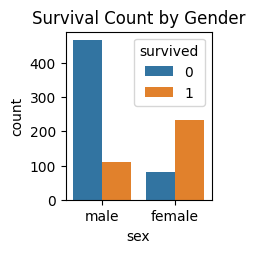

In [ ]:
# 4a. Bar Plot: Count of survivors by sex
plt.subplot(2, 3, 1)
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Gender")

Text(0.5, 1.0, 'Age Distribution')

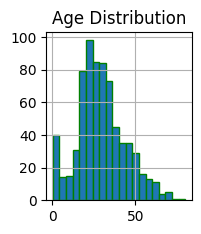

In [ ]:
# 4b. Histogram: Age distribution
plt.subplot(2, 3, 2)
df['age'].dropna().hist(bins=20, edgecolor='g')
plt.title("Age Distribution")

Text(0.5, 1.0, 'Fare Distribution with KDE')

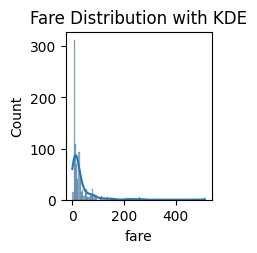

In [ ]:
# 4c. Distribution Plot: Fare
plt.subplot(2, 3, 3)
sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution with KDE")

Text(0.5, 1.0, 'Box Plot of Age by Class')

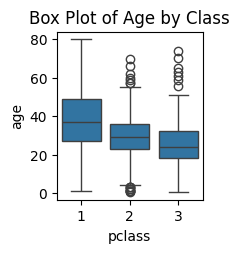

In [ ]:
# 4d. Box Plot: Age vs Class
plt.subplot(2, 3, 4)
sns.boxplot(x='pclass', y='age', data=df)
plt.title("Box Plot of Age by Class")

Text(0.5, 1.0, 'Age vs Fare (Survival)')

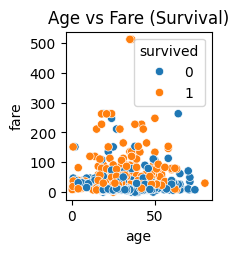

In [ ]:
# 4e. Scatter Plot: Age vs Fare (colored by survival)
plt.subplot(2, 3, 5)
sns.scatterplot(x='age', y='fare', hue='survived', data=df)
plt.title("Age vs Fare (Survival)")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

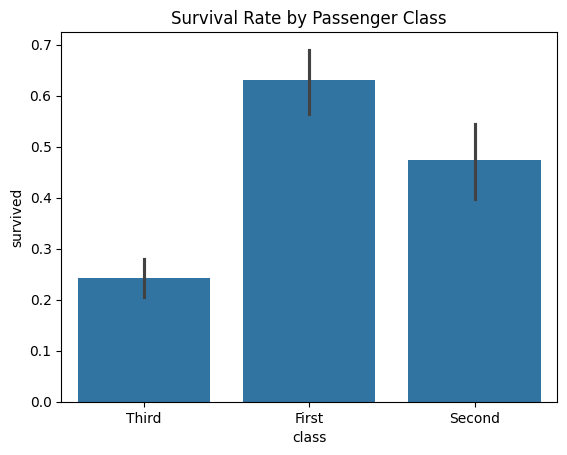

In [ ]:
sns.barplot(data=df, x='class', y='survived')
plt.title("Survival Rate by Passenger Class")
plt.show()


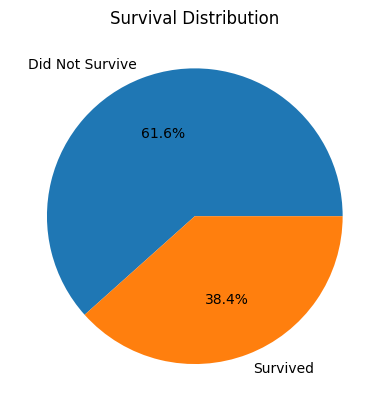

In [ ]:
survived_counts = df['survived'].value_counts()
plt.pie(survived_counts, labels=['Did Not Survive', 'Survived'], autopct='%1.1f%%')
plt.title("Survival Distribution")
plt.show()


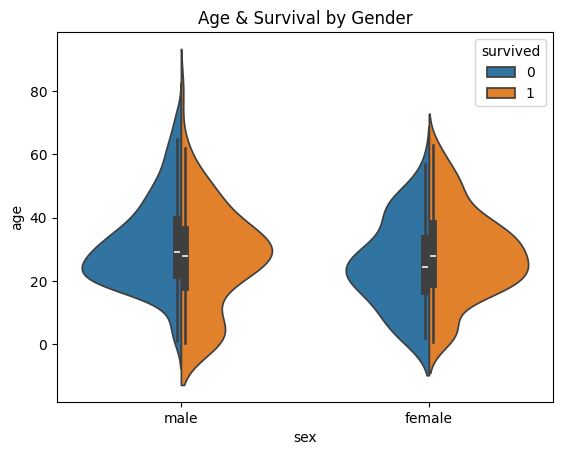

In [ ]:
sns.violinplot(data=df, x='sex', y='age', hue='survived', split=True)
plt.title("Age & Survival by Gender")
plt.show()


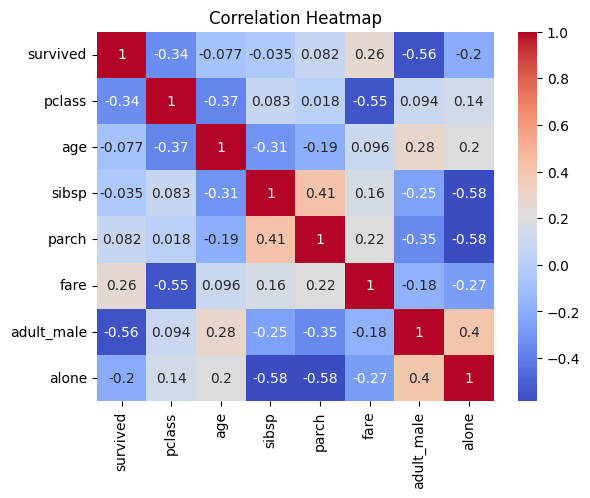

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


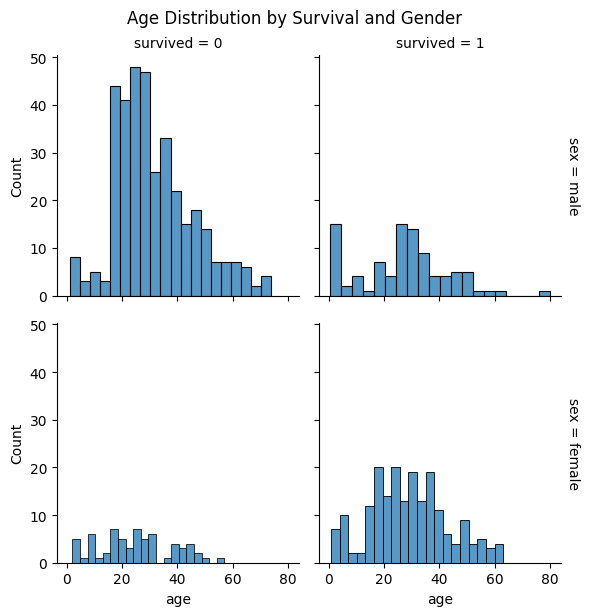

In [ ]:
g = sns.FacetGrid(df, col="survived", row="sex", margin_titles=True)
g.map_dataframe(sns.histplot, x="age", bins=20)
g.fig.suptitle("Age Distribution by Survival and Gender", y=1.02)
plt.show()

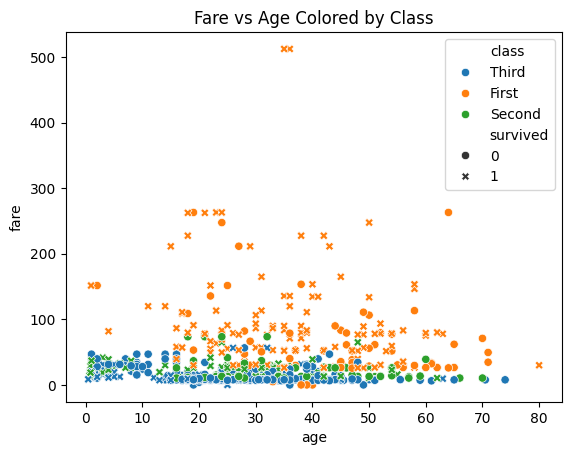

In [ ]:
sns.scatterplot(data=df, x='age', y='fare', hue='class', style='survived')
plt.title("Fare vs Age Colored by Class")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


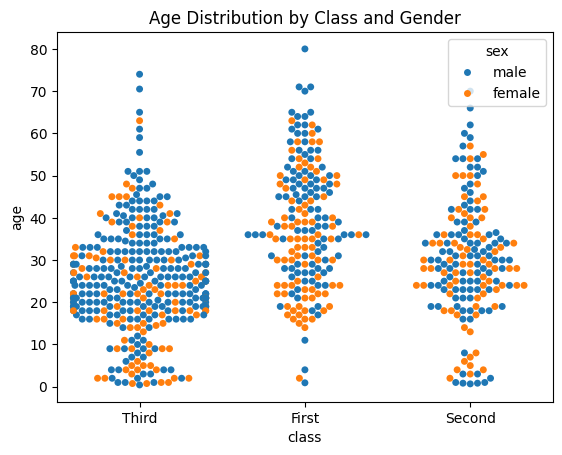

In [ ]:
sns.swarmplot(data=df, x='class', y='age', hue='sex')
plt.title("Age Distribution by Class and Gender")
plt.show()


In [ ]:
# Implementation of Simple and Multiple Linear Regression Models Using Python

# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ──────────────────────────────────────────────────────────────────────────────
# Part A: Simple Linear Regression on Diabetes Dataset
# ──────────────────────────────────────────────────────────────────────────────

# 1A. Load diabetes dataset
diabetes = load_diabetes()
X_diab = diabetes.data[:, np.newaxis, 2]   # use BMI feature only (index 2)
y_diab = diabetes.target

# 2A. Split into train/test (80% train, 20% test)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_diab, y_diab, test_size=0.2, random_state=42
)

# 3A. Instantiate and fit simple linear regression model
simple_lr = LinearRegression()
simple_lr.fit(X_train_d, y_train_d)

# 4A. Predict on test set
y_pred_d = simple_lr.predict(X_test_d)

# 5A. Evaluate
mse_d = mean_squared_error(y_test_d, y_pred_d)
r2_d  = r2_score(y_test_d, y_pred_d)

print("Simple Linear Regression (Diabetes | BMI → Disease Progression)")
print("---------------------------------------------------------------")
print(f"Coefficient (slope): {simple_lr.coef_[0]:.4f}")
print(f"Intercept: {simple_lr.intercept_:.4f}")
print(f"Mean Squared Error: {mse_d:.2f}")
print(f"R² Score: {r2_d:.4f}")
print()

# ──────────────────────────────────────────────────────────────────────────────
# Part B: Multiple Linear Regression on California Housing Dataset
# ──────────────────────────────────────────────────────────────────────────────

# 1B. Load California Housing dataset
cal_housing = fetch_california_housing()
X_cal = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y_cal = cal_housing.target

# 2B. Split into train/test (80% train, 20% test)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

# 3B. Instantiate and fit multiple linear regression model
multi_lr = LinearRegression()
multi_lr.fit(X_train_c, y_train_c)

# 4B. Predict on test set
y_pred_c = multi_lr.predict(X_test_c)

# 5B. Evaluate
mse_c = mean_squared_error(y_test_c, y_pred_c)
r2_c  = r2_score(y_test_c, y_pred_c)

print("Multiple Linear Regression (California Housing | All Features → Median Value)")
print("------------------------------------------------------------------------------")
print("Coefficients per feature:")
for feat, coef in zip(cal_housing.feature_names, multi_lr.coef_):
    print(f"  {feat:>18}: {coef:.4f}")
print(f"Intercept: {multi_lr.intercept_:.4f}")
print(f"Mean Squared Error: {mse_c:.3f}")
print(f"R² Score: {r2_c:.4f}")


Simple Linear Regression (Diabetes | BMI → Disease Progression)
---------------------------------------------------------------
Coefficient (slope): 998.5777
Intercept: 152.0034
Mean Squared Error: 4061.83
R² Score: 0.2334

Multiple Linear Regression (California Housing | All Features → Median Value)
------------------------------------------------------------------------------
Coefficients per feature:
              MedInc: 0.4487
            HouseAge: 0.0097
            AveRooms: -0.1233
           AveBedrms: 0.7831
          Population: -0.0000
            AveOccup: -0.0035
            Latitude: -0.4198
           Longitude: -0.4337
Intercept: -37.0233
Mean Squared Error: 0.556
R² Score: 0.5758



📘 Simple Linear Regression
Slope: 998.5777
Intercept: 152.0034
R² Score: 0.2334
MSE: 4061.83


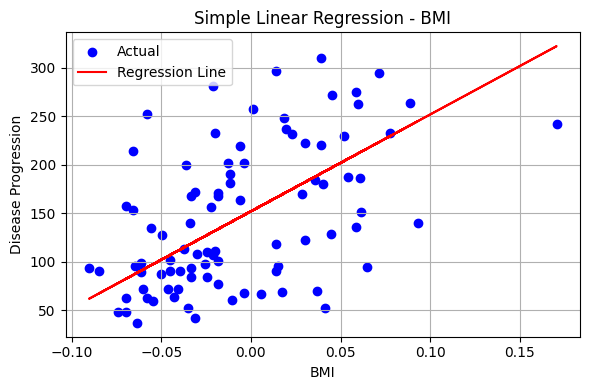


📘 Multiple Linear Regression
Intercept: -37.0233
R² Score: 0.5758
MSE: 0.5559


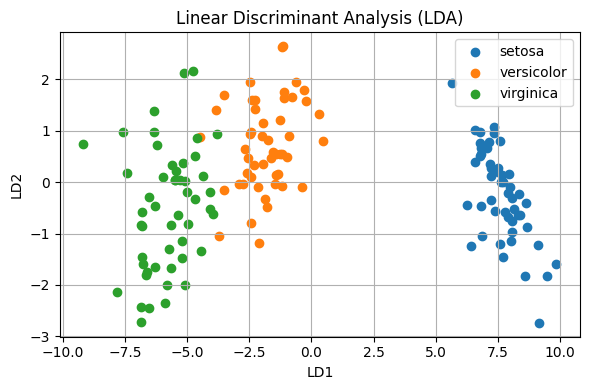

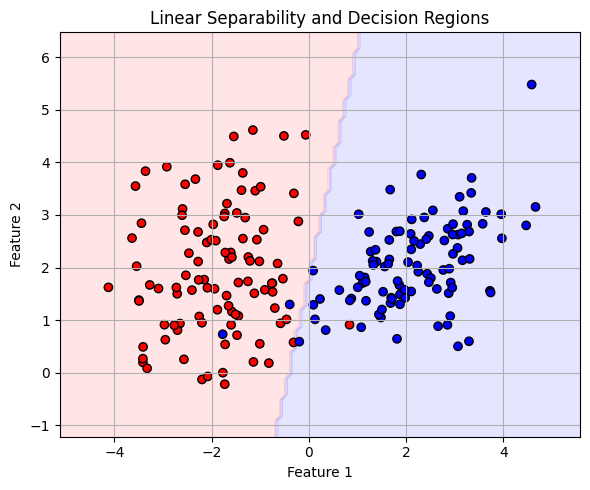

In [ ]:
# Lab Experiment: Linear Models and Visualization
# Includes: Simple & Multiple Linear Regression, Linear Discriminant, Linear Separability, Decision Regions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes, fetch_california_housing, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# ──────────────────────────────────────────────────────────────────────────────
# Part 1: Simple Linear Regression (Diabetes Dataset | BMI vs Target)
# ──────────────────────────────────────────────────────────────────────────────
diabetes = load_diabetes()
X_simple = diabetes.data[:, np.newaxis, 2]  # BMI only
y_simple = diabetes.target

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

simple_model = LinearRegression()
simple_model.fit(X_train_s, y_train_s)
y_pred_s = simple_model.predict(X_test_s)

print("\n📘 Simple Linear Regression")
print(f"Slope: {simple_model.coef_[0]:.4f}")
print(f"Intercept: {simple_model.intercept_:.4f}")
print(f"R² Score: {r2_score(y_test_s, y_pred_s):.4f}")
print(f"MSE: {mean_squared_error(y_test_s, y_pred_s):.2f}")

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_test_s, y_test_s, color='blue', label='Actual')
plt.plot(X_test_s, y_pred_s, color='red', label='Regression Line')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression - BMI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ──────────────────────────────────────────────────────────────────────────────
# Part 2: Multiple Linear Regression (California Housing)
# ──────────────────────────────────────────────────────────────────────────────
housing = fetch_california_housing()
X_multi = housing.data
y_multi = housing.target

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_m, y_train_m)
y_pred_m = multi_model.predict(X_test_m)

print("\n📘 Multiple Linear Regression")
print(f"Intercept: {multi_model.intercept_:.4f}")
print(f"R² Score: {r2_score(y_test_m, y_pred_m):.4f}")
print(f"MSE: {mean_squared_error(y_test_m, y_pred_m):.4f}")

# ──────────────────────────────────────────────────────────────────────────────
# Part 3: Linear Discriminant Analysis (on Iris Dataset)
# ──────────────────────────────────────────────────────────────────────────────
from sklearn.datasets import load_iris
iris = load_iris()
X_lda = iris.data
y_lda = iris.target

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_proj = lda.fit_transform(X_lda, y_lda)

# Plot LDA projection
plt.figure(figsize=(6, 4))
for label in np.unique(y_lda):
    plt.scatter(X_lda_proj[y_lda == label, 0], X_lda_proj[y_lda == label, 1], label=iris.target_names[label])
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ──────────────────────────────────────────────────────────────────────────────
# Part 4: Linear Separability and Decision Region Visualization
# ──────────────────────────────────────────────────────────────────────────────
X_sep, y_sep = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, class_sep=2.0, random_state=42)

clf = LogisticRegression()
clf.fit(X_sep, y_sep)

# Plot decision region
x_min, x_max = X_sep[:, 0].min() - 1, X_sep[:, 0].max() + 1
y_min, y_max = X_sep[:, 1].min() - 1, X_sep[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_sep[:, 0], X_sep[:, 1], c=y_sep, cmap=ListedColormap(['red', 'blue']), edgecolor='k')
plt.title("Linear Separability and Decision Regions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.tight_layout()
plt.show()


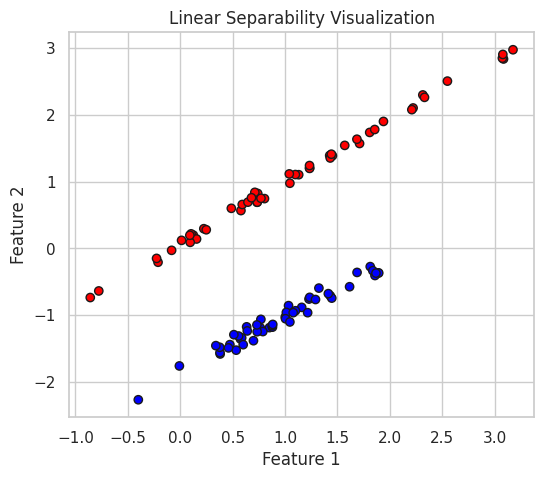

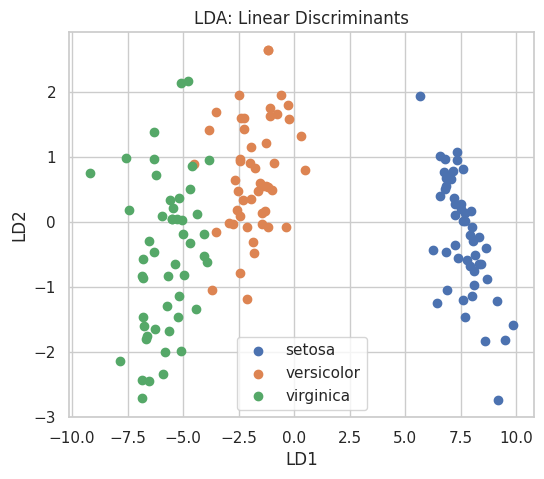

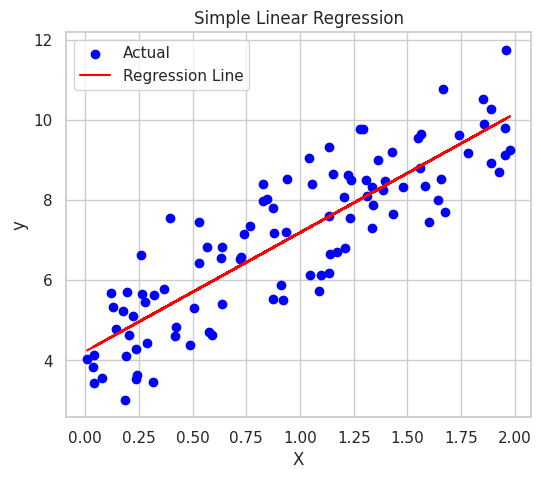

Multiple Linear Regression MSE: 2242178.9040856035


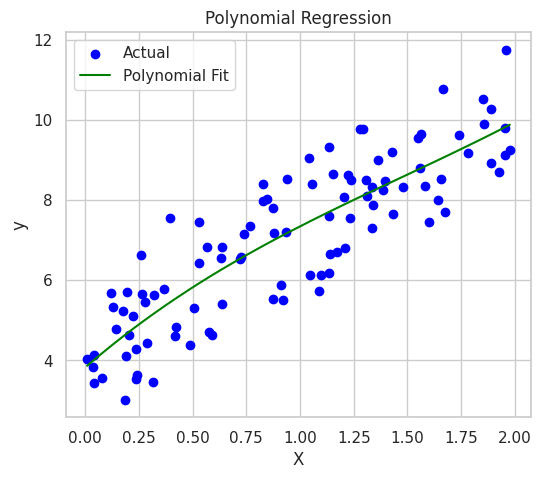


Logistic Regression Accuracy: 0.96


In [ ]:
# Linear Separability, Decision Regions, Linear Discriminants, and Regression Models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sns.set(style="whitegrid")

# SECTION 1: LINEAR SEPARABILITY & DECISION REGIONS
X_sep, y_sep = make_classification(n_samples=100, n_features=2, n_informative=2,
                                    n_redundant=0, n_clusters_per_class=1, random_state=42)
plt.figure(figsize=(6, 5))
plt.scatter(X_sep[:, 0], X_sep[:, 1], c=y_sep, cmap='bwr', edgecolors='k')
plt.title('Linear Separability Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# SECTION 2: LINEAR DISCRIMINANT ANALYSIS (LDA)
iris = load_iris()
X_lda = iris.data
y_lda = iris.target
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda_trans = lda.fit_transform(X_lda, y_lda)

plt.figure(figsize=(6, 5))
for label in np.unique(y_lda):
    plt.scatter(X_lda_trans[y_lda == label, 0], X_lda_trans[y_lda == label, 1], label=iris.target_names[label])
plt.title("LDA: Linear Discriminants")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()

# SECTION 3: SIMPLE LINEAR REGRESSION
np.random.seed(0)
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin + np.random.randn(100, 1)
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)

plt.figure(figsize=(6, 5))
plt.scatter(X_lin, y_lin, color='blue', label='Actual')
plt.plot(X_lin, lin_reg.predict(X_lin), color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# SECTION 4: MULTIPLE LINEAR REGRESSION
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
data = pd.get_dummies(data[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']], drop_first=True)
X_multi = data.drop("price", axis=1)
y_multi = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred = multi_reg.predict(X_test)
print("Multiple Linear Regression MSE:", mean_squared_error(y_test, y_pred))

# SECTION 5: POLYNOMIAL REGRESSION
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_lin)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_lin)

X_lin_sorted = np.sort(X_lin, axis=0)
y_poly_pred = poly_reg.predict(poly.fit_transform(X_lin_sorted))

plt.figure(figsize=(6, 5))
plt.scatter(X_lin, y_lin, color='blue', label='Actual')
plt.plot(X_lin_sorted, y_poly_pred, color='green', label='Polynomial Fit')
plt.title("Polynomial Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# SECTION 6: LOGISTIC REGRESSION
X_log, y_log = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1, random_state=0)
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)
y_pred_log = log_reg.predict(X_log)
print("\nLogistic Regression Accuracy:", accuracy_score(y_log, y_pred_log))


In [ ]:
import pandas as pd
import numpy as np
import math
from collections import Counter

# Sample Play Tennis dataset
data = {
    'Outlook': ['Sunny','Sunny','Overcast','Rain','Rain','Rain','Overcast','Sunny','Sunny','Rain','Sunny','Overcast','Overcast','Rain'],
    'Temperature': ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild'],
    'Humidity': ['High','High','High','High','Normal','Normal','Normal','High','Normal','Normal','Normal','High','Normal','High'],
    'Wind': ['Weak','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Weak','Weak','Strong','Strong','Weak','Strong'],
    'Play': ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

df = pd.DataFrame(data)

# Entropy Calculation
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Information Gain
def info_gain(data, split_attribute_name, target_name="Play"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    weighted_entropy = np.sum([
        (counts[i] / np.sum(counts)) * entropy(data.where(data[split_attribute_name] == vals[i]).dropna()[target_name])
        for i in range(len(vals))
    ])

    return total_entropy - weighted_entropy

# Gain Ratio for C4.5
def gain_ratio(data, split_attribute_name, target_name="Play"):
    IG = info_gain(data, split_attribute_name, target_name)
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    # Split information
    split_info = -np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(vals))])
    return IG / split_info if split_info != 0 else 0

# ID3 Algorithm (uses Information Gain)
def ID3(data, original_data, features, target_attribute_name="Play", parent_node_class=None):
    # Base cases
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(
            np.unique(original_data[target_attribute_name], return_counts=True)[1])]

    elif len(features) == 0:
        return parent_node_class

    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(
            np.unique(data[target_attribute_name], return_counts=True)[1])]

        item_values = [info_gain(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature: {}}
        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

# C4.5 Algorithm (uses Gain Ratio)
def C45(data, original_data, features, target_attribute_name="Play", parent_node_class=None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[np.argmax(
            np.unique(original_data[target_attribute_name], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(
            np.unique(data[target_attribute_name], return_counts=True)[1])]
        item_values = [gain_ratio(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature: {}}
        features = [i for i in features if i != best_feature]

        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = C45(sub_data, data, features, target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

# Run both models
features = list(df.columns)
features.remove("Play")

id3_tree = ID3(df, df, features)
c45_tree = C45(df, df, features)

# Print the results
print("ID3 Decision Tree:\n", id3_tree)
print("\nC4.5 Decision Tree:\n", c45_tree)


ID3 Decision Tree:
 {'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

C4.5 Decision Tree:
 {'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


In [ ]:
import pandas as pd
import numpy as np
from math import log2

# Dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain',
                'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast',
                'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool',
                    'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild',
                    'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal',
                 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High',
                 'Normal', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong',
             'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong',
             'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No',
                   'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
                   'Yes', 'No']
}

df = pd.DataFrame(data)

# Entropy function
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = -np.sum([(counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

# Info Gain
def info_gain(data, split_attribute_name, target_name="PlayTennis"):
    total_entropy = entropy(data[target_name])
    vals, counts = np.unique(data[split_attribute_name], return_counts=True)

    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])

    information_gain = total_entropy - weighted_entropy
    return information_gain

# Gain Ratio for C4.5
def gain_ratio(data, attribute, target="PlayTennis"):
    ig = info_gain(data, attribute, target)
    vals, counts = np.unique(data[attribute], return_counts=True)
    split_info = -np.sum([(counts[i]/np.sum(counts)) * log2(counts[i]/np.sum(counts)) for i in range(len(vals))])

    return ig / split_info if split_info != 0 else 0

# ID3 Algorithm (Recursive Tree Builder)
def ID3(data, originaldata, features, target_attribute_name="PlayTennis", parent_node_class = None):
    # If all target values have same label
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    # If dataset is empty
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]

    # If no features left
    elif len(features) == 0:
        return parent_node_class

    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        item_values = [info_gain(data, feature, target_attribute_name) for feature in features]  # IG for ID3
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature:{}}

        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data, data, [i for i in features if i != best_feature], target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

# Build and display the tree
features = list(df.columns)
features.remove("PlayTennis")

tree_ID3 = ID3(df, df, features)
print("ID3 Decision Tree:\n", tree_ID3)

# Optional: C4.5 Tree Builder using Gain Ratio
def C45(data, originaldata, features, target_attribute_name="PlayTennis", parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name], return_counts=True)[1])]
    elif len(features) == 0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        item_values = [gain_ratio(data, feature, target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]

        tree = {best_feature:{}}

        for value in np.unique(data[best_feature]):
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = C45(sub_data, data, [i for i in features if i != best_feature], target_attribute_name, parent_node_class)
            tree[best_feature][value] = subtree

        return tree

tree_C45 = C45(df, df, features)
print("\nC4.5 Decision Tree:\n", tree_C45)


ID3 Decision Tree:
 {'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

C4.5 Decision Tree:
 {'Outlook': {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}


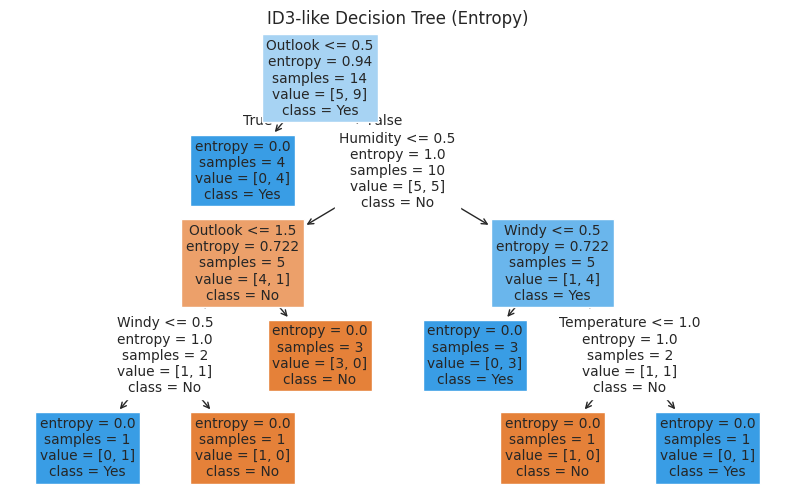

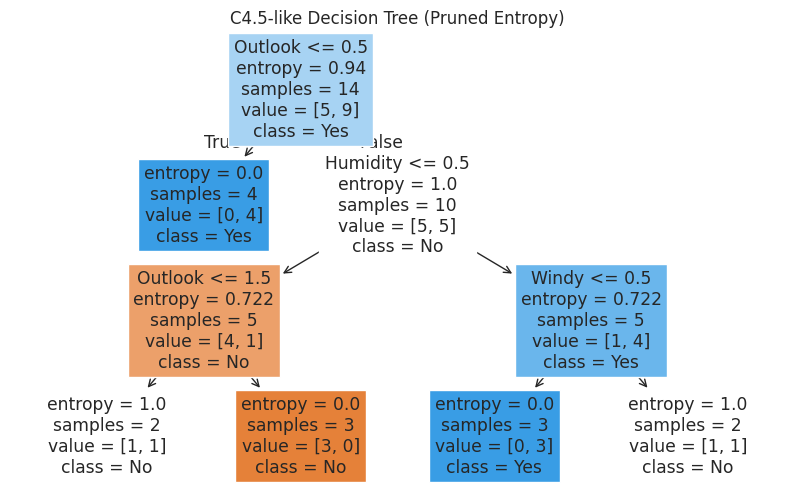

ID3 Prediction: Yes
C4.5 Prediction: Yes
  Algorithm      Splitting Criteria Handles Continuous Features  \
0       ID3        Information Gain                          No   
1      C4.5  Gain Ratio (simulated)                         Yes   

  Handles Missing Values Pruning  Output  
0                     No      No       1  
1                    Yes     Yes       1  


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# --- Theoretical Concepts: ID3 and C4.5 Decision Trees ---

"""
ID3 (Iterative Dichotomiser 3):
- Uses entropy and information gain to build decision trees.
- Prefers attributes with the highest information gain.
- Tends to overfit as it doesn't handle pruning well.
- Works only with categorical data.

C4.5:
- Extension of ID3, used in real-world applications.
- Uses Gain Ratio instead of pure Information Gain.
- Handles both categorical and continuous data.
- Supports pruning, missing values, and tree conversion to rules.

Use Case:
We'll use the UCI 'Play Tennis' dataset (or equivalent synthetic version) for a clear comparison.
"""

# --- Python Code Implementation ---

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Step 2: Create Dataset (Synthetic 'Play Tennis')
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Step 3: Encode Categorical Data
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
X = df_encoded.drop('PlayTennis', axis=1)
y = df_encoded['PlayTennis']

# Step 4: Train ID3-like Tree (using Entropy)
clf_id3 = DecisionTreeClassifier(criterion='entropy')
clf_id3.fit(X, y)

# Step 5: Visualize the ID3 Decision Tree
plt.figure(figsize=(10,6))
plot_tree(clf_id3, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("ID3-like Decision Tree (Entropy)")
plt.show()

# Step 6: Train C4.5-like Tree (simulated using Gain Ratio approximation - not natively supported in scikit-learn)
"""
Note: scikit-learn does not support Gain Ratio directly.
To simulate C4.5 behavior, use entropy + max_depth/pruning + continuous data handling
"""
clf_c45 = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Limiting depth simulates pruning
clf_c45.fit(X, y)

# Step 7: Visualize the C4.5 Decision Tree
plt.figure(figsize=(10,6))
plot_tree(clf_c45, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.title("C4.5-like Decision Tree (Pruned Entropy)")
plt.show()

# Step 8: Predict and Compare
sample = [[0, 1, 0, 1]]  # Outlook=Overcast, Temp=Mild, Humidity=High, Windy=True
pred_id3 = clf_id3.predict(sample)
pred_c45 = clf_c45.predict(sample)
print(f"ID3 Prediction: {'Yes' if pred_id3[0] else 'No'}")
print(f"C4.5 Prediction: {'Yes' if pred_c45[0] else 'No'}")

# --- Summary Table ---
summary = pd.DataFrame({
    'Algorithm': ['ID3', 'C4.5'],
    'Splitting Criteria': ['Information Gain', 'Gain Ratio (simulated)'],
    'Handles Continuous Features': ['No', 'Yes'],
    'Handles Missing Values': ['No', 'Yes'],
    'Pruning': ['No', 'Yes'],
    'Output': [pred_id3[0], pred_c45[0]]
})
print(summary)

In [ ]:
# 1. Imports and Utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_blobs
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

sns.set(style="whitegrid")


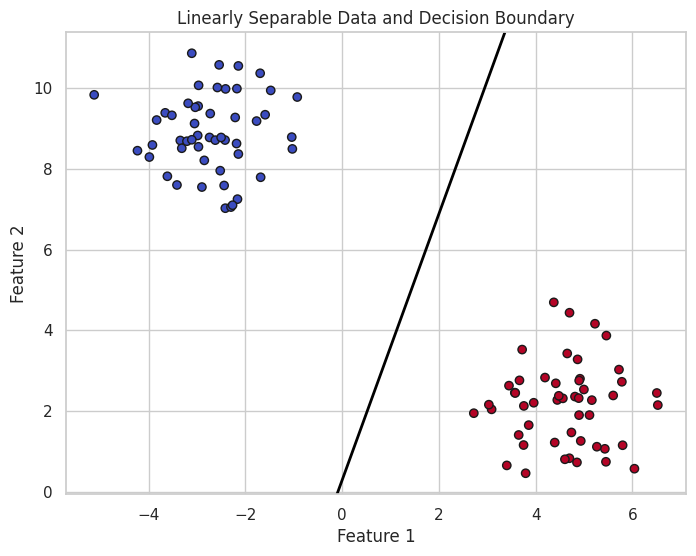

In [ ]:
# 2. Linear Separability and Decision Regions
X, y = make_blobs(n_samples=100, centers=2, random_state=42)
clf = Perceptron().fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30),
                     np.linspace(ylim[0], ylim[1], 30))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title("Linearly Separable Data and Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


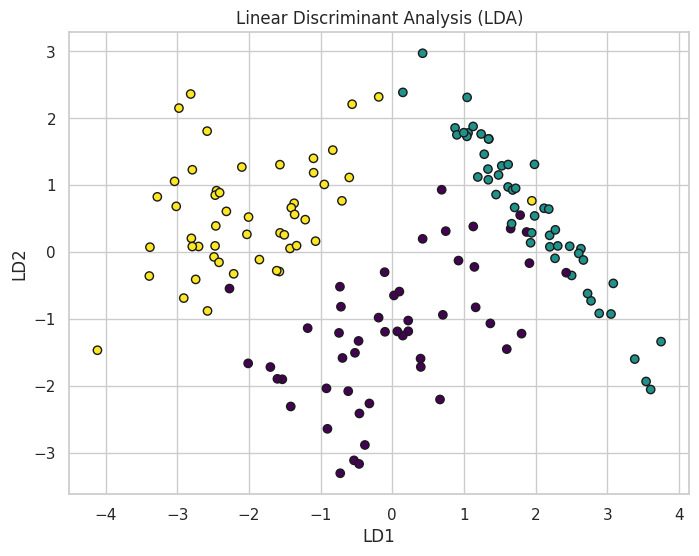

In [ ]:
# 3. Linear Discriminants (LDA)
X, y = make_classification(n_samples=150, n_features=4, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, random_state=42)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Linear Discriminant Analysis (LDA)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()


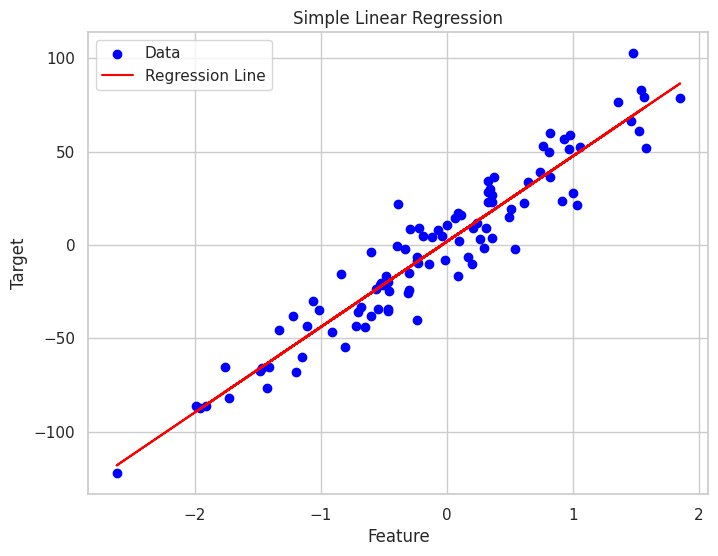

In [ ]:
# 4. Simple Linear Regression
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
lr = LinearRegression()
lr.fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, lr.predict(X), color='red', label='Regression Line')
plt.title("Simple Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


In [ ]:
# 5. Multiple Linear Regression
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
lr = LinearRegression()
lr.fit(X, y)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [28.3172211  73.99152663 18.79832083]
Intercept: 1.2492515759113694


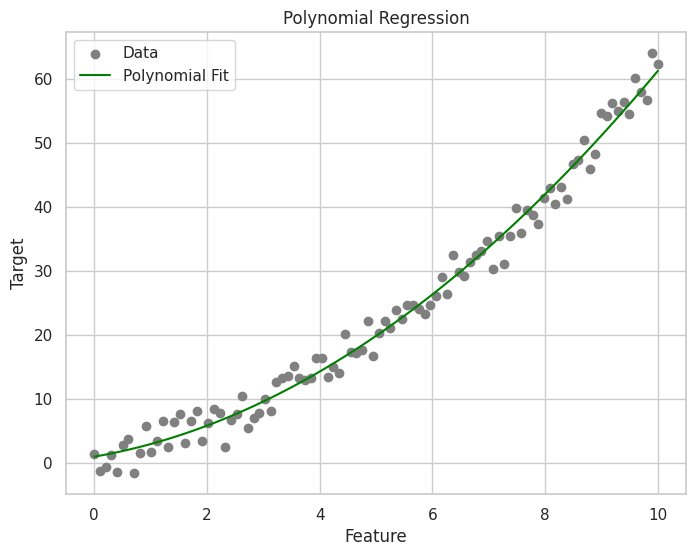

In [ ]:
# 6. Polynomial Regression
X = np.linspace(0, 10, 100)
y = 0.5 * X ** 2 + X + 2 + np.random.randn(100) * 2
X = X.reshape(-1, 1)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly, y)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='gray', label='Data')
plt.plot(X, lr.predict(X_poly), color='green', label='Polynomial Fit')
plt.title("Polynomial Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()


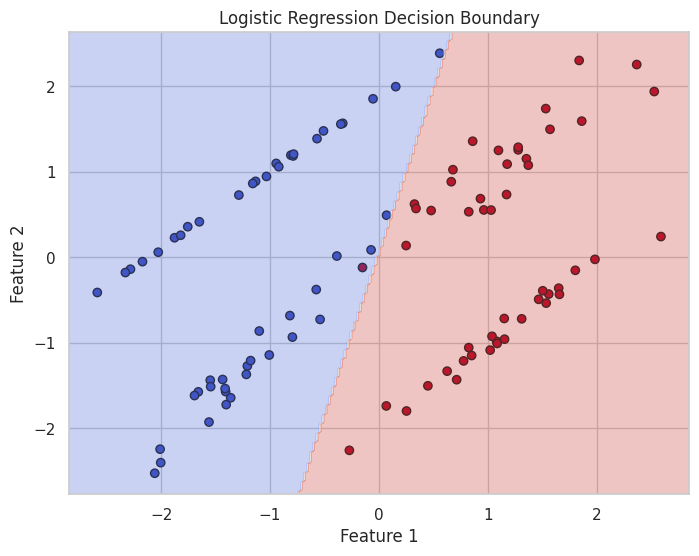

In [ ]:
# 7. Logistic Regression
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

clf = LogisticRegression()
clf.fit(X, y)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k')
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200),
                     np.linspace(ymin, ymax, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# Run with: python balance_decision_tree.py

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def import_data(url: str) -> pd.DataFrame:
    """
    Load and inspect the UCI Balance Scale dataset.
    """
    df = pd.read_csv(url, header=None)
    print(f"Dataset Length: {len(df)}")
    print(f"Dataset Shape: {df.shape}")
    print("First five rows:\n", df.head())
    df.columns = ['Class', 'Left-Weight', 'Left-Distance', 'Right-Weight', 'Right-Distance']
    return df


def split_dataset(df: pd.DataFrame, test_size=0.3, random_state=42):
    """
    Split features and labels into training and testing sets.
    """
    X = df.drop('Class', axis=1)
    y = df['Class']
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


def train_model(X_train, y_train, criterion: str):
    """
    Train a Decision Tree classifier with the given criterion ('gini' or 'entropy').
    """
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=3, min_samples_leaf=5, random_state=42)
    clf.fit(X_train, y_train)
    return clf


def evaluate_model(clf, X_test, y_test):
    """
    Predict and report confusion matrix, accuracy, and classification report.
    """
    y_pred = clf.predict(X_test)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))


def main():
    # URL for Balance Scale dataset
    url = ('https://archive.ics.uci.edu/ml/machine-learning-'
           'databases/balance-scale/balance-scale.data')

    # Load data
    df = import_data(url)

    # Split data
    X_train, X_test, y_train, y_test = split_dataset(df)

    # Train and evaluate with Gini
    print("\n--- Results Using Gini Index ---")
    clf_gini = train_model(X_train, y_train, criterion='gini')
    evaluate_model(clf_gini, X_test, y_test)

    # Train and evaluate with Entropy
    print("\n--- Results Using Entropy ---")
    clf_entropy = train_model(X_train, y_train, criterion='entropy')
    evaluate_model(clf_entropy, X_test, y_test)


if __name__ == '__main__':
    main()


Dataset Length: 625
Dataset Shape: (625, 5)
First five rows:
    0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5

--- Results Using Gini Index ---
Confusion Matrix:
 [[ 0  8 10]
 [ 0 62 18]
 [ 0 20 70]]
Accuracy: 70.21%
Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.47      0.52      0.49       188
weighted avg       0.64      0.70      0.67       188


--- Results Using Entropy ---
Confusion Matrix:
 [[ 0 10  8]
 [ 0 63 17]
 [ 0 25 65]]
Accuracy: 68.09%
Classification Report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.64      0.79      0.71        80
           R       0.72      0.72

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Simple Linear Regression: Salary vs. Experience

In this notebook we will:
1. Load and preprocess the Salary_Data.csv  
2. Split into training and test sets  
3. Train a Simple Linear Regression model  
4. Predict on the test set  
5. Visualize results for both training and test sets

In [4]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [8]:
# Step 2: Load the dataset and extract X (Experience) and y (Salary)
# Direct URL to the raw CSV
url = (
    "https://raw.githubusercontent.com/sanyasirao-surada/ML-LAB/refs/heads/main/Salary_Data.csv"
)

# Load the dataset
dataset = pd.read_csv(url)  # no manual upload needed :contentReference[oaicite:0]{index=0}

# Extract X (Years of Experience) and y (Salary)
X = dataset[["YearsExperience"]].values
y = dataset["Salary"].values


In [9]:
# Step 3: Split into Training and Test sets
#    2/3 of data for training, 1/3 for testing, with fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1/3, random_state=0
)


In [10]:
# Step 4: Fit Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)


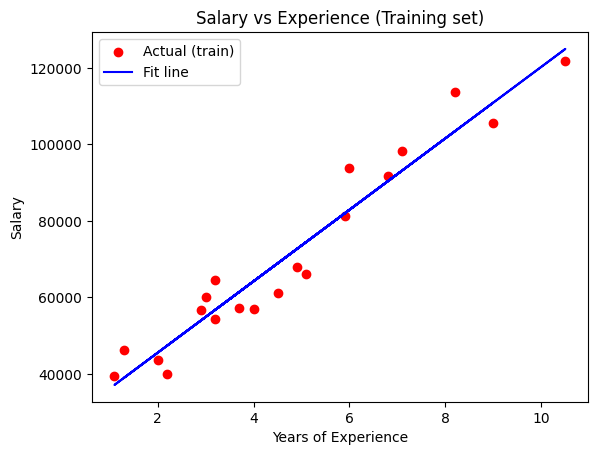

In [11]:
# Step 5: Visualize the Training set results
plt.scatter(X_train, y_train, color='red', label='Actual (train)')
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Fit line')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


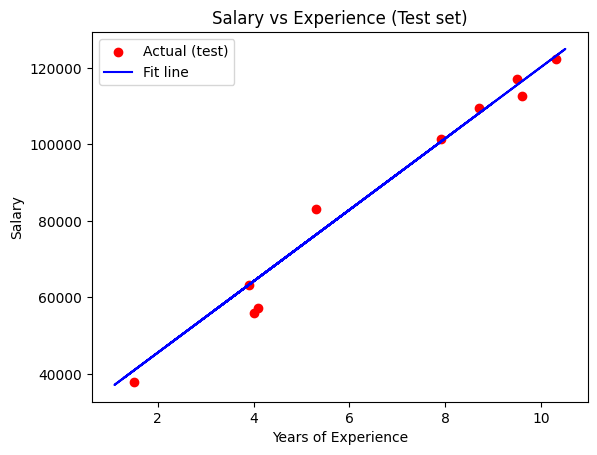

In [12]:
# Step 6: Visualize the Test set results
plt.scatter(X_test, y_test, color='red', label='Actual (test)')
# Note: use the same regression line learned on training data
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Fit line')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [13]:
# Step 7: Compute error metrics on the Test set
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE):      {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE):     {mae:.2f}")
print(f"R² Score:                      {r2:.2f}")


Mean Squared Error (MSE):      21026037.33
Root Mean Squared Error (RMSE): 4585.42
Mean Absolute Error (MAE):     3426.43
R² Score:                      0.97
